<a href="https://colab.research.google.com/github/russodanielp/intro_cheminformatics/blob/master/DeepLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning

## Aim

To understand the basics of a neural network and to create a simple deep learning neural network using PyTorch.

## Objectives 

* Create a simple deep learning model using PyTorch

## Background

The explosion of the amounts of accessible, publically available data couples with hardware advances such as graphical processing units (GPUs) has lead to the resurgances of deep learning methods.  Deep learning is a catch-all term for various types of artificial neural networks, which have seen in the QSAR lab.  A simple neural network generally consists of one input later, a hidden layer, and an output layer.  However, this framework can be extended to include any number of hidden layers.  When an artificial neural network contains more than 1 hidden layer, it is called a deep neural network.  

Part of Python's popularity is the number of deep learning libraries.  The [PyTorch](https://pytorch.org/) is one of the most popular and will be used in this tab to create a fairly standard neural network of 3 hidden layers.  

In [ ]:
!pip3 install torch torchvision torchaudio

In [ ]:
import numpy as np
import torch
from torch import nn

In [45]:
class NeuralNetwork(nn.Module):
    def __init__(self, n_features=1024):
        super(NeuralNetwork, self).__init__()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(n_features, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        logits = self.linear_relu_stack(x)
        return logits

In [50]:
X = np.random.randint(2, size=(100, 1024)).astype('float32')
y =  np.random.randint(2, size=(100,))

In [51]:
model = NeuralNetwork().to('cpu')
print(model)

NeuralNetwork(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=1024, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [52]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

## Model training

Model training a neural network works by taking epochs, also known as steps.  Mathematically, it is an optimization problem where we are trying to find the neural network parameters which minimize the loss function.  In this case our loss function is binary cross entroy, which is how well our model is predicting our classes (0, 1).  After every epoch, the loss is calculated and for each parameters some calculus is applied to figure our which way we should adjust these parameters such that the loss will be lower the next epoch.  This is usually repeated until some specified number of training epochs or some other stopping point.  


In [60]:
EPOCHS = 1000
losses = []

for epoch in range(EPOCHS):  # loop over the dataset multiple times

    running_loss = 0.0


    # zero the parameter gradients
    optimizer.zero_grad()

    # forward + backward + optimize
    outputs = model(torch.from_numpy(X))
    loss = criterion(outputs, torch.from_numpy(y))
    loss.backward()
    optimizer.step()

    # print statistics
    running_loss += loss.item()
    losses.append(loss.item())

print('Finished Training')

Finished Training


## Training Plots

It's often common to monitor the loss function 

In [61]:
% matplotlib inline

NameError: ignored

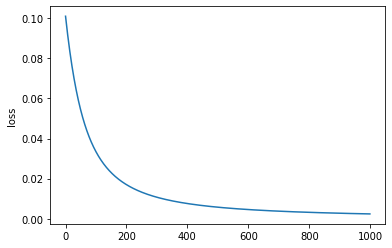

In [63]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.plot(range(EPOCHS), losses)

ax.set_ylabel('loss')
ax.set_xlabel('epochs')
plt.show()